In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/Users/mertc/OneDrive/Desktop/Amazon_Proje/amazon.csv')

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B08WRWPM22,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [24]:
df['discounted_price'] = df['discounted_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False).astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False).astype(float)

df['discount_percentage'] = df['discount_percentage'].str.replace('%', '', regex=False).astype(float)

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df['rating_count'] = df['rating_count'].str.replace(',', '', regex=False).astype(float)

print("Temizleme tamamlandı!")
df[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].head(10)

Temizleme tamamlandı!


,discounted_price,actual_price,discount_percentage,rating,rating_count
0,399.00,1099.0,64.0,4.2,24269.0
1,199.00,349.0,43.0,4.0,43994.0
2,199.00,1899.0,90.0,3.9,7928.0
3,329.00,699.0,53.0,4.2,94363.0
4,154.00,399.0,61.0,4.2,16905.0
5,149.00,1000.0,85.0,3.9,24871.0
6,176.63,499.0,65.0,4.1,15188.0
7,229.00,299.0,23.0,4.3,30411.0
8,499.00,999.0,50.0,4.2,179691.0
9,199.00,299.0,33.0,4.0,43994.0


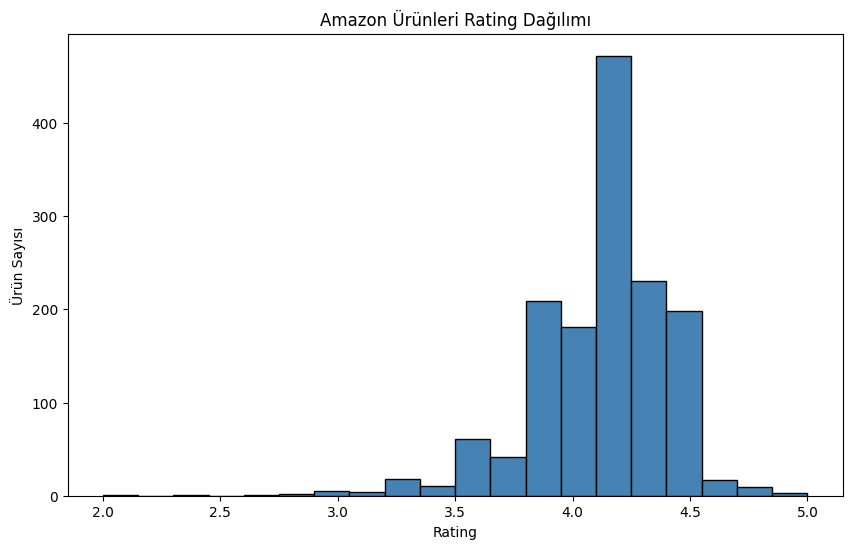

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df['rating'].dropna(), bins=20, color='steelblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Ürün Sayısı')
plt.title('Amazon Ürünleri Rating Dağılımı')
plt.show()

main_category
Electronics              526
Computers&Accessories    453
Home&Kitchen             448
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64


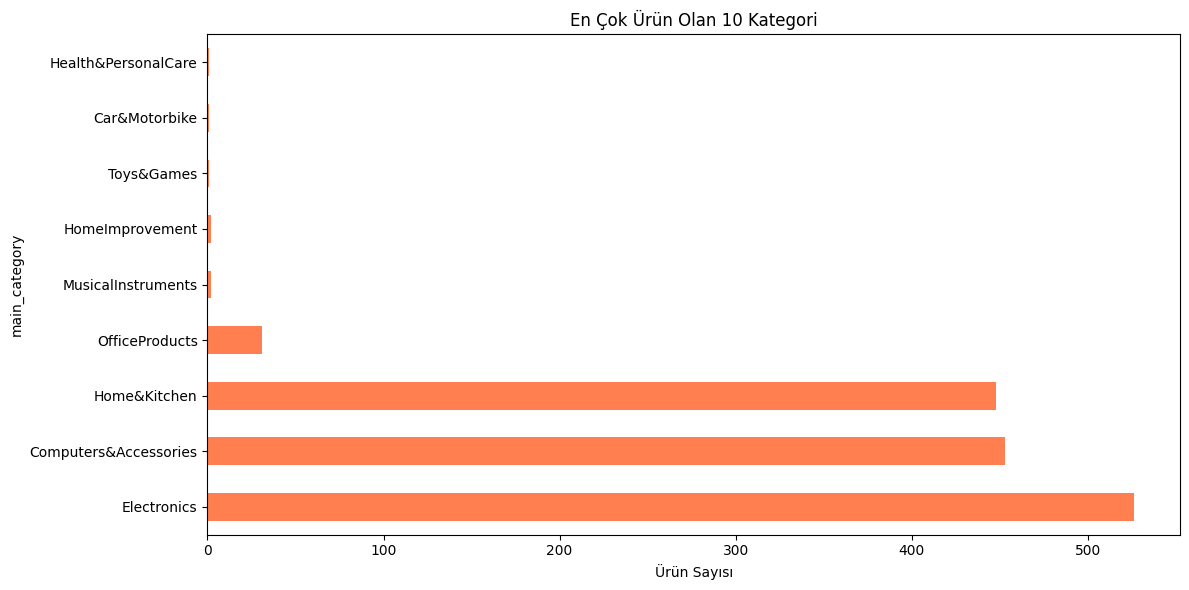

In [26]:
df['main_category'] = df['category'].str.split('|').str[0]

top_categories = df['main_category'].value_counts().head(10)
print(top_categories)

plt.figure(figsize=(12, 6))
top_categories.plot(kind='barh', color='coral')
plt.xlabel('Ürün Sayısı')
plt.title('En Çok Ürün Olan 10 Kategori')
plt.tight_layout()
plt.show()

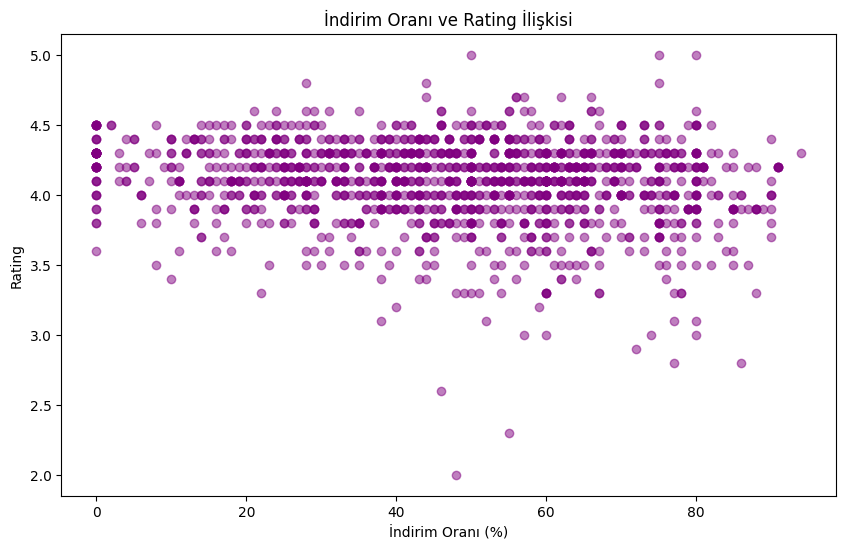

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(df['discount_percentage'], df['rating'], alpha=0.5, color='purple')
plt.xlabel('İndirim Oranı (%)')
plt.ylabel('Rating')
plt.title('İndirim Oranı ve Rating İlişkisi')
plt.show()

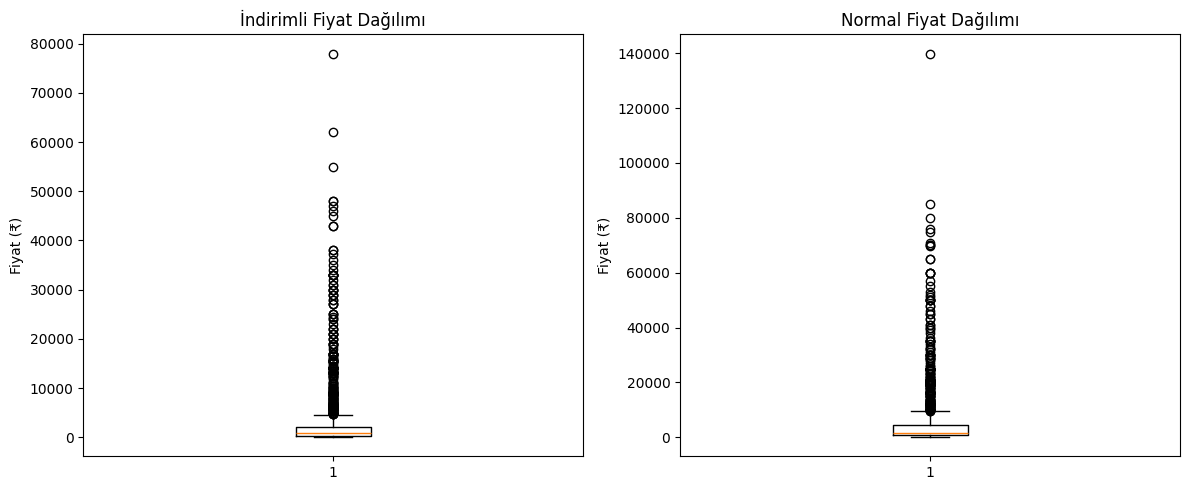

In [28]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot(df['discounted_price'].dropna())
plt.title('İndirimli Fiyat Dağılımı')
plt.ylabel('Fiyat (₹)')

plt.subplot(1, 2, 2)
plt.boxplot(df['actual_price'].dropna())
plt.title('Normal Fiyat Dağılımı')
plt.ylabel('Fiyat (₹)')

plt.tight_layout()
plt.show()

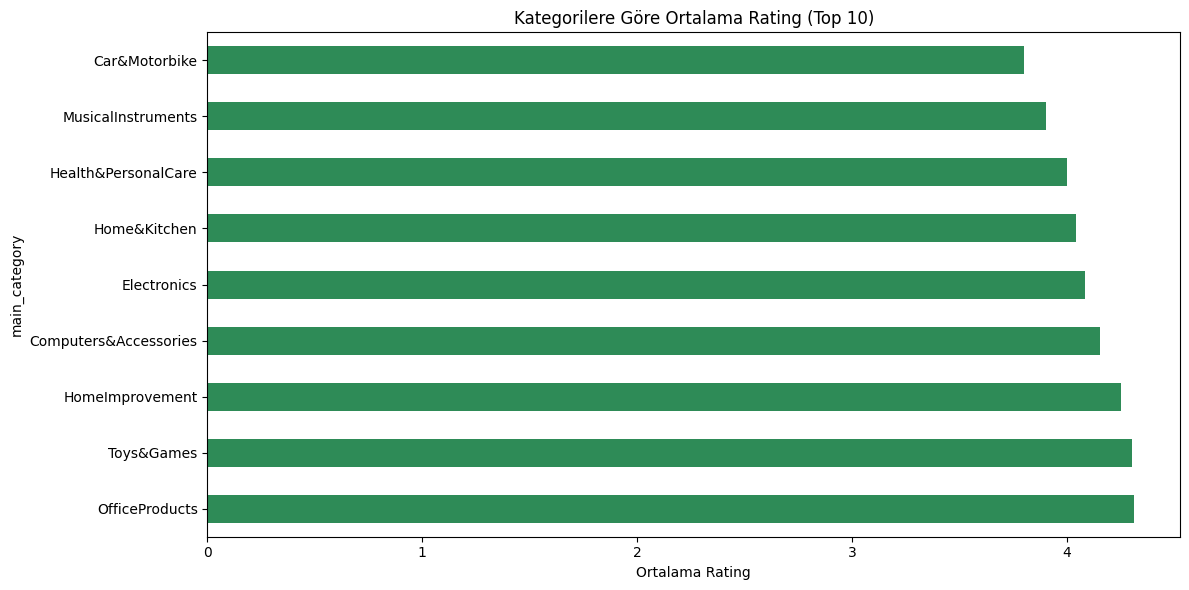

In [29]:
category_ratings = df.groupby('main_category')['rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
category_ratings.plot(kind='barh', color='seagreen')
plt.xlabel('Ortalama Rating')
plt.title('Kategorilere Göre Ortalama Rating (Top 10)')
plt.tight_layout()
plt.show()

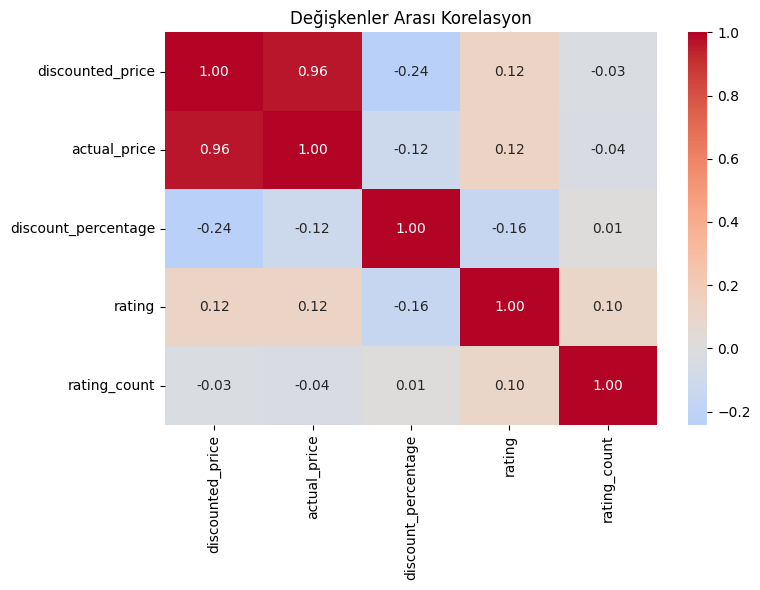

In [30]:
correlation_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']
corr_matrix = df[correlation_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Değişkenler Arası Korelasyon')
plt.tight_layout()
plt.show()

In [39]:
print("=" * 50)
print("AMAZON SALES DATASET - TEMEL İÇGÖRÜLER")
print("=" * 50)

print(f"\nToplam ürün sayısı: {len(df)}")
print(f"Kategori sayısı: {df['main_category'].nunique()}")
print(f"\nOrtalama indirim oranı: %{df['discount_percentage'].mean():.1f}")
print(f"Ortalama rating: {df['rating'].mean():.2f}")
print(f"Ortalama değerlendirme sayısı: {df['rating_count'].mean():.0f}")

print(f"\nEn yüksek rating'li kategori: {category_ratings.index[0]} ({category_ratings.values[0]:.2f})")
print(f"En düşük rating'li kategori: {category_ratings.index[-1]} ({category_ratings.values[-1]:.2f})")

AMAZON SALES DATASET - TEMEL İÇGÖRÜLER

Toplam ürün sayısı: 1465
Kategori sayısı: 9

Ortalama indirim oranı: %47.7
Ortalama rating: 4.10
Ortalama değerlendirme sayısı: 18296

En yüksek rating'li kategori: OfficeProducts (4.31)
En düşük rating'li kategori: Car&Motorbike (3.80)


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

print("ML kütüphaneleri yüklendi!")

ML kütüphaneleri yüklendi!


In [41]:
features = ['discounted_price', 'actual_price', 'discount_percentage', 'rating_count']
target = 'rating'

ml_data = df[features + [target]].dropna()

X = ml_data[features]
y = ml_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Eğitim seti: {len(X_train)} ürün")
print(f"Test seti: {len(X_test)} ürün")

Eğitim seti: 1169 ürün
Test seti: 293 ürün


In [42]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("=" * 50)
print("MODEL PERFORMANS KARŞILAŞTIRMASI")
print("=" * 50)

print("\nLinear Regression:")
print(f"   MAE: {mean_absolute_error(y_test, lr_pred):.3f}")
print(f"   R² Score: {r2_score(y_test, lr_pred):.3f}")

print("\nRandom Forest:")
print(f"   MAE: {mean_absolute_error(y_test, rf_pred):.3f}")
print(f"   R² Score: {r2_score(y_test, rf_pred):.3f}")

MODEL PERFORMANS KARŞILAŞTIRMASI

Linear Regression:
   MAE: 0.208
   R² Score: 0.058

Random Forest:
   MAE: 0.187
   R² Score: 0.107


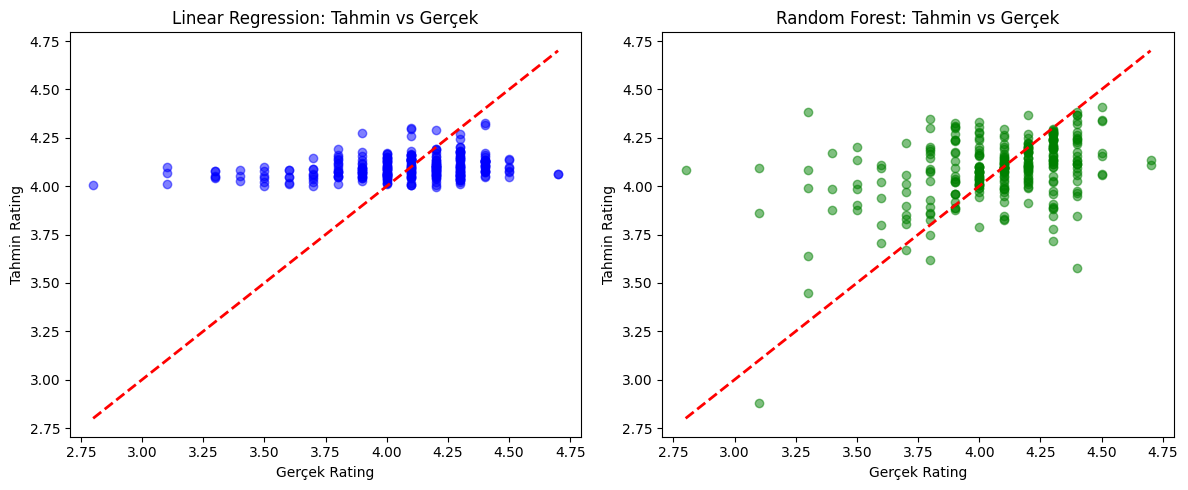

In [43]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Gerçek Rating')
plt.ylabel('Tahmin Rating')
plt.title('Linear Regression: Tahmin vs Gerçek')

plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Gerçek Rating')
plt.ylabel('Tahmin Rating')
plt.title('Random Forest: Tahmin vs Gerçek')

plt.tight_layout()
plt.show()

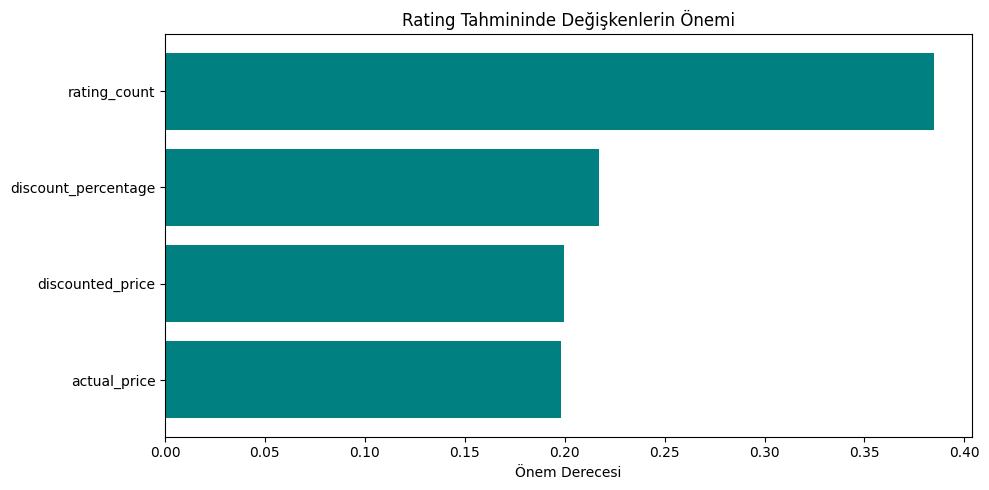

               Feature  Importance
3         rating_count    0.384734
2  discount_percentage    0.217360
0     discounted_price    0.199766
1         actual_price    0.198140


In [44]:
importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 5))
plt.barh(importance['Feature'], importance['Importance'], color='teal')
plt.xlabel('Önem Derecesi')
plt.title('Rating Tahmininde Değişkenlerin Önemi')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(importance)

In [45]:
print("=" * 60)
print("AMAZON SALES DATASET - PROJE SONUÇLARI")
print("=" * 60)

print("\nVERİ SETİ:")
print(f"   • {len(df)} ürün analiz edildi")
print(f"   • {df['main_category'].nunique()} farklı kategori")

print("\nTEMEL BULGULAR:")
print(f"   • Ortalama indirim oranı: %{df['discount_percentage'].mean():.1f}")
print(f"   • Ortalama ürün rating'i: {df['rating'].mean():.2f}/5")
print(f"   • Rating ile indirim arasında zayıf ilişki var")

print("\nMAKİNE ÖĞRENMESİ:")
print(f"   • Random Forest modeli Linear Regression'dan daha iyi performans gösterdi")
print(f"   • En etkili değişken: Rating Count (%{rf_model.feature_importances_[3]*100:.1f})")
print(f"   • Model doğruluğu (R²): {r2_score(y_test, rf_pred):.1%}")

print("\nİŞ ÖNERİLERİ:")
print("   • Yüksek yorum sayısı güvenilir rating göstergesi")
print("   • İndirim oranı tek başına rating'i belirlemede yetersiz")
print("   • Müşteri yorumları teşvik edilmeli")
print("=" * 60)

AMAZON SALES DATASET - PROJE SONUÇLARI

VERİ SETİ:
   • 1465 ürün analiz edildi
   • 9 farklı kategori

TEMEL BULGULAR:
   • Ortalama indirim oranı: %47.7
   • Ortalama ürün rating'i: 4.10/5
   • Rating ile indirim arasında zayıf ilişki var

MAKİNE ÖĞRENMESİ:
   • Random Forest modeli Linear Regression'dan daha iyi performans gösterdi
   • En etkili değişken: Rating Count (%38.5)
   • Model doğruluğu (R²): 10.7%

İŞ ÖNERİLERİ:
   • Yüksek yorum sayısı güvenilir rating göstergesi
   • İndirim oranı tek başına rating'i belirlemede yetersiz
   • Müşteri yorumları teşvik edilmeli
